In [2]:
import numpy as np
np.set_printoptions(precision=4)  # print arrays to 4 dp
import numpy.linalg as npl
import matplotlib.pyplot as plt
import nibabel as nib
import nipraxis

In [ ]:
conv_reg_fname = nipraxis.fetch_file('ds114_sub009_t2r1_conv.txt')

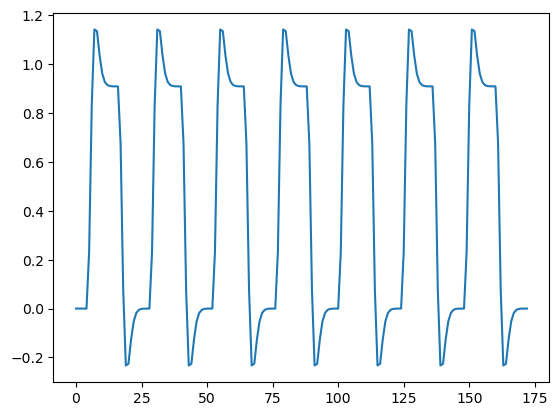

In [4]:
regressor = np.loadtxt(conv_reg_fname)
plt.plot(regressor);

In [7]:
# Fetch.
bold_fname = nipraxis.fetch_file('ds114_sub009_t2r1.nii')

In [9]:
# Load
data = nib.load(bold_fname).get_fdata()
data = data[..., 4:]
print(data.shape)
n = data.shape[-1]

(64, 64, 30, 169)


In [11]:
regressor = regressor[4:]

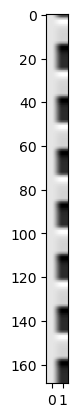

In [12]:
X = np.ones((n, 2))
X[:, 1] = regressor
plt.imshow(X, cmap='gray', aspect=0.2)

In [13]:
Y = np.reshape(data, (-1, n))
Y = Y.T
Y.shape

(169, 122880)

In [15]:
B = npl.pinv(X) @ Y
B.shape

(2, 122880)

In [17]:
c = np.array([0, 1])

In [18]:
top_of_t = c @ B
top_of_t.shape

(122880,)